In [1]:
import pandas as pd

In [29]:
df = pd.read_csv("Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [6]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [7]:
df.source_city.value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [8]:
df.destination_city.value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [9]:
df.departure_time.value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [10]:
df.arrival_time.value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [11]:
df["class"].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [12]:
df.duration.min()

0.83

In [14]:
df.duration.max()

49.83

In [15]:
df.duration.mean()

12.221020812718846

In [17]:
df.stops.value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [18]:
df.days_left.value_counts()

25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: days_left, dtype: int64

Preprocessing

In [30]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('flight', axis = 1)

In [33]:
df['class'] = df['class'].apply(lambda x: 1 if x == "Business" else 0)

In [34]:
df.stops = pd.factorize(df.stops)[0]

In [39]:
df = df.join(pd.get_dummies(df.airline, prefix = "airline")).drop("airline", axis = 1)
df = df.join(pd.get_dummies(df.source_city, prefix = "source")).drop("source_city", axis = 1)
df = df.join(pd.get_dummies(df.destination_city, prefix = "dest")).drop("destination_city", axis = 1)
df = df.join(pd.get_dummies(df.arrival_time, prefix = "arrival")).drop("arrival_time", axis = 1)
df = df.join(pd.get_dummies(df.departure_time, prefix = "departure")).drop("departure_time", axis = 1)

In [40]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Training Regression Model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis = 1), df.price

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2)

In [51]:
reg = RandomForestRegressor(n_jobs = -1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [52]:
reg.score(X_test, y_test)

0.9850322993901518

In [56]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9850322993901518
MAE: 1082.2684039555452
MSE: 7712748.94040155
RMSE: 2777.1836346200716


Text(0.5, 1.0, 'Prediction Vs Actual Price')

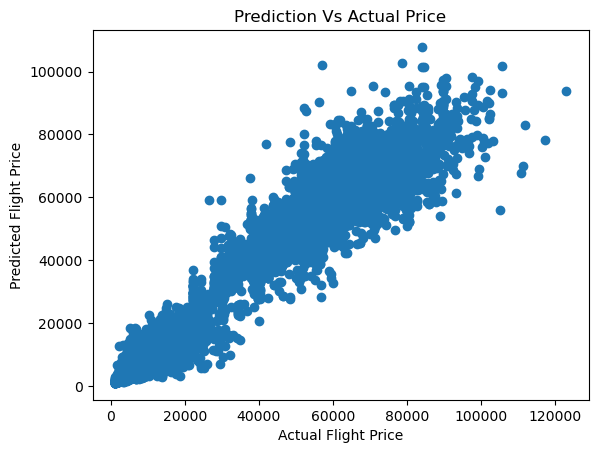

In [59]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction Vs Actual Price")

In [60]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.909414536347263
MAE: 4521.559274144669
MSE: 46678040.73684744
RMSE: 6832.132956613727


Text(0.5, 1.0, 'Prediction Vs Actual Price')

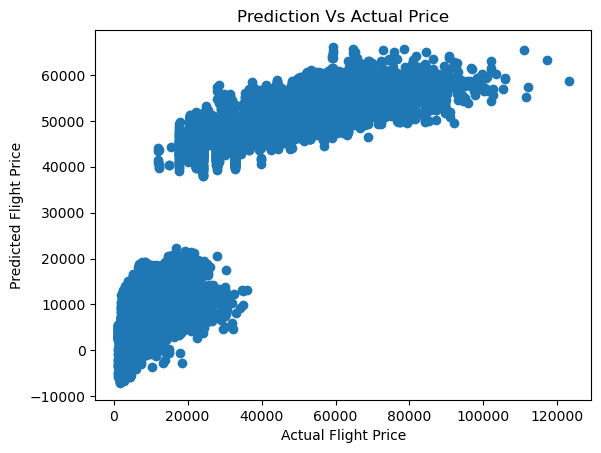

In [62]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction Vs Actual Price")

In [67]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key = lambda x: x[1], reverse = True)

sorted_importances

[('class', 0.880186928072729),
 ('duration', 0.057313580260618634),
 ('days_left', 0.018467190937559795),
 ('airline_Air_India', 0.0054556922208062065),
 ('airline_Vistara', 0.004537467584466381),
 ('source_Delhi', 0.00403438072191181),
 ('dest_Delhi', 0.003470327121514823),
 ('source_Mumbai', 0.0021762160538380234),
 ('dest_Mumbai', 0.001986777875265065),
 ('dest_Kolkata', 0.0017507619370676782),
 ('source_Kolkata', 0.0017258148515979775),
 ('dest_Hyderabad', 0.0016756484042453),
 ('stops', 0.0016598230247646263),
 ('arrival_Evening', 0.0014170305260860802),
 ('source_Hyderabad', 0.001286043997696319),
 ('source_Bangalore', 0.001131257394958938),
 ('departure_Evening', 0.00111680530478429),
 ('arrival_Night', 0.0011126269948714175),
 ('dest_Bangalore', 0.0011010529851288899),
 ('arrival_Afternoon', 0.0010322094543378786),
 ('source_Chennai', 0.0008957774398711525),
 ('departure_Morning', 0.0008786297456154158),
 ('dest_Chennai', 0.0008508979907621841),
 ('departure_Night', 0.000789069

<BarContainer object of 10 artists>

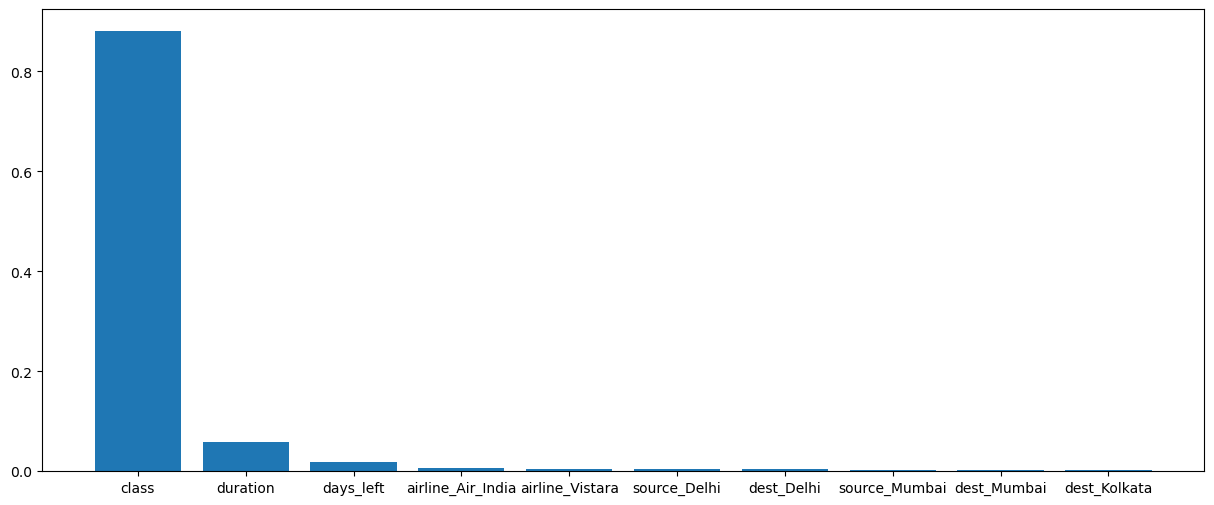

In [73]:
plt.figure(figsize = (15, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

##TAKES A LOOOONG TIME ##

reg = RandomForestRegressor(n_jobs = -1)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"]
}

grid_search = GridSearchCV(estimator, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist =best_regressor   "n_estimators": randint(100, 300),
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 5),
    "max_features": [1.0, "sqrt"]
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring="neg_mean_squared_error", verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [79]:
best_regressor.score(X_test, y_test)

0.9859214709031261

In [80]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9859214709031261
MAE: 1099.71784387525
MSE: 7254565.227131958
RMSE: 2693.430011552548


In [ ]:
#If we have similar data to what we used for training, we could call the trained model to make predictions about the airplane ticket price
best_regressor.predict()